In [1]:
import cv2 #for image processing
import easygui #to open the filebox
import numpy as np #to store image
import imageio #to read image stored at particular path
import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

## Choosing a file

In [2]:
ImagePath=easygui.fileopenbox()

## Transforming an image into numpy array

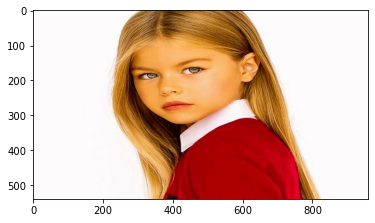

In [3]:
#Imread method is used to store images in the form of numbers. 
#The image is read as a numpy array, in which cell values depict R, G, and B values of a pixel.
originalmage = cv2.imread(ImagePath)
originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
# print(originalmage)  # image is stored in form of numbers
# confirm that image is chosen
if originalmage is None:
    print("Can not find any image. Choose appropriate file")
    sys.exit()
ReSized1 = cv2.resize(originalmage, (960, 540))
#resize the image after each transformation to display all the images on a similar scale at last
plt.imshow(ReSized1, cmap='gray')

## Transforming an image to grayscale

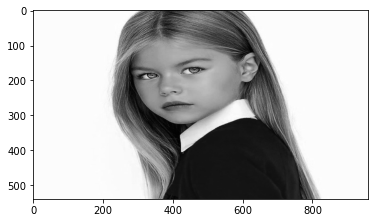

In [4]:
#converting an image to grayscale
grayScaleImage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
ReSized2 = cv2.resize(grayScaleImage, (960, 540))
plt.imshow(ReSized2, cmap='gray')

## Smoothening a grayscale image

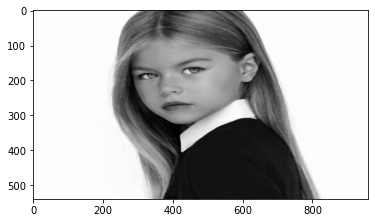

In [5]:
# applying median blur to smoothen an image
smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
plt.imshow(ReSized3, cmap='gray')

## Retrieving the edges of an image

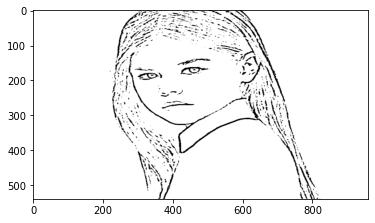

In [6]:
#retrieving the edges for cartoon effect
#by using thresholding technique
getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, 
  cv2.ADAPTIVE_THRESH_MEAN_C, 
  cv2.THRESH_BINARY, 9, 9)
ReSized4 = cv2.resize(getEdge, (960, 540))
plt.imshow(ReSized4, cmap='gray')

## Preparing a Mask Image

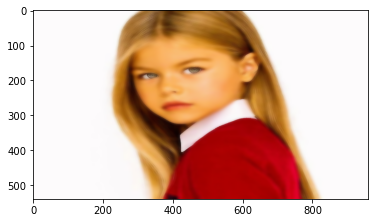

In [7]:
# applying bilateral filter to remove noise 
#and keep edge sharp as required
colorImage = cv2.bilateralFilter(originalmage, 15, 300, 300)
ReSized5 = cv2.resize(colorImage, (960, 540))
plt.imshow(ReSized5, cmap='gray')

## Connecting two images with mask

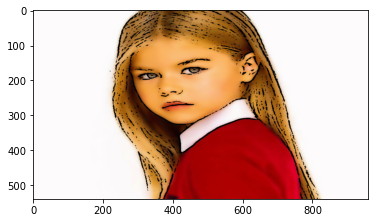

In [8]:
#masking edged image with our "BEAUTIFY" image
cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)
ReSized6 = cv2.resize(cartoonImage, (960, 540))
plt.imshow(ReSized6, cmap='gray')

## Saving cartoonified image into path choosed in the first step.

In [9]:
newName="cartoonified_Image"
path1 = os.path.dirname(ImagePath)
extension=os.path.splitext(ImagePath)[1]
path = os.path.join(path1, newName+extension)
cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))
print(f"Image saved by name {newName} at {path}")

Image saved by name cartoonified_Image at C:\Users\MICHU13\Desktop\cartoonified_Image.jpg
